<h1 align="center"> Data Science Analytics Project (PH6130) </h1>
<h2 align='center'> Analyzing USA Real Estate Trends: A Frequentist Statistical Study
<h3> Team: <br>
Preethi G - AI23MTECH14005 <br>
Sumukha B G - AI23MTECH14006 </h3>


<h2> Introduction: </h2> 
In this project, we delve into the realm of statistical analysis, particularly focusing on a frequentist approach, and explore its significance in data science. Statistical analysis is fundamental in drawing meaningful insights from data, and understanding its core concepts such as outliers, interquartile range (IQR), and hypothesis testing is crucial for any data scientist.

<b>Why Statistical Analysis Matters:</b>
Statistical analysis allows us to uncover patterns, trends, and relationships within data, providing valuable insights for decision-making. By understanding the distribution of data, we can make informed predictions and draw reliable conclusions, which is essential in various domains including finance, healthcare, marketing, and more.

<b>Exploring Key Concepts:</b>
Throughout this project, we aim to elucidate the importance of statistical concepts often encountered in data science. For instance, outliers are data points that deviate significantly from the rest of the dataset and can skew our analysis if not properly addressed. Understanding measures like the mean and median, and when to use them, helps in gaining a comprehensive view of the data distribution.

<b>Data Source:</b>
For our analysis, we utilize the American Community Survey (ACS) 5-Year Documentation provided by the U.S. Census Reports. This dataset offers a comprehensive overview of various socio-economic factors across different states in the USA.

<b>Additional Contents:</b>
Apart from basic statistical analysis, we delve into inferential statistics, which involves making inferences about a population based on a sample. We explore hypothesis testing, confidence intervals, and significance levels to draw meaningful conclusions from our data. Additionally, we introduce the Chi-Squared Test of Independence for analyzing relationships between categorical variables.

<b>References and Resources:</b>
Throughout this project, we refer to various statistical resources and tutorials to deepen our understanding of statistical concepts and techniques. These include online tutorials, academic papers, and data visualization tools like ggplot.

By the end of this project, we aim to demonstrate the practical applications of statistical analysis in real-world scenarios, particularly focusing on USA real estate trends, and highlight its significance in data-driven decision-making.



<h3> Data Source: </h3> 
ACS 5-Year Documentation was provided by the U.S. Census Reports

https://www2.census.gov/programs-surveys/acs/summary_file/2016/data/5_year_by_state/

https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2016_Gazetteer/

<h3> Contents: </h3>

I. <b>Basic Statistical Analysis</b> <br>
a) [The relationship between mean and median](#mean_median) <br>
b) [Boxplots and Suspected Outliers](#boxplots) <br>
c) [Using natural logarithms and Qplots](#qplots) <br><br>


II. <b>Inferential Statistics</b> <br>
a) [Hypothesis testing and Confidence Intervals](#hypothesis_testing) <br>
b) [Interpreting Confidence Intervals](#confidence_intervals) <br>
c) [Significance levels and P-values.](#p_val) <br>
d) [Brief Introduction to Chi-Squared Test of Independence (will be continue)](#chi_s) <br>
e) [Contingency Tables for Categorical Variables](#contingency)<br>
f) [T-Distribution](#t_distribution) <br>
g) [Difference Between two Independent Means](#two_independent)<br>
h) [Bootstrapping (Simulation base method)](#bootstrapping)<br><br>


III.  Other Statistics <br>
a) [Visualizing Contingency Tables](#mosaic) <br>
b) [Chloropeth Maps with GGPlot2](#us_map)

<h3> References: </h3>
a) <a href="http://www.statisticshowto.com/"> Statistics Terminology </a><br>
b) <a href="https://www.datacamp.com/tracks/data-visualization-with-r"> Data visualization with ggplot Part 2 </a> by Rick Scavetta <br>
c) <a href="https://stats.stackexchange.com/questions/149219/what-is-the-definition-of-expected-counts-in-chi-square-tests"> Stack Exchange Reply</a> by Penguin_Knight<br>
d) <a href="http://rpubs.com/zach_loertscher/406399"> Outlier Detection </a> by Zach Loertscher <br>
e)  <a href="https://www.goldenoakresearch.com/hedging-real-estate-research"> Real Estate Research </a> by Zach Loertscher

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import chi2_contingency
from scipy.stats import t
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

- Reading Dataset: We loaded the dataset from the CSV file named 'real_estate_db.csv' using Pandas read_csv() function.
- Printing First Few Rows: We printed the first few rows of the dataset using head() to get an initial idea of the data structure.
- Printing Summary Statistics: We printed summary statistics of the dataset using describe() to understand the distribution of numerical features.
- Selecting Numeric Columns: We selected only the numeric columns from the dataset using the select_dtypes() method with the argument include='number'. This helps us focus on numerical data for our analysis. Finally, we printed the names of the numeric columns using .columns.

In [2]:
df = pd.read_csv('RealEstate_DB.csv',encoding='latin1')

print(df.head())
print(df.describe())

# Selecting numeric columns
numerics = df.select_dtypes(include='number')
print(numerics.columns)

      UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID   state state_ab         city  \
0  220336      NaN       140        16        2  Alaska       AK     Unalaska   
1  220342      NaN       140        20        2  Alaska       AK  Eagle River   
2  220343      NaN       140        20        2  Alaska       AK         Jber   
3  220345      NaN       140        20        2  Alaska       AK    Anchorage   
4  220347      NaN       140        20        2  Alaska       AK    Anchorage   

             place  type  ... female_age_mean  female_age_median  \
0    Unalaska City  City  ...        32.78177           31.91667   
1        Anchorage  City  ...        38.97956           39.66667   
2        Anchorage  City  ...        22.20427           23.16667   
3  Point Mackenzie  City  ...        37.00750           34.00000   
4        Anchorage  City  ...        34.96611           31.75000   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          19.31875       

In [3]:
df.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

______

<h4> Types of Distributions </h4>
<a id="mean_median"></a>
<ul> 
<li><b> Normal Distribution: </b> Commonly known as the bell curve, a normal distribution is symmetric where half of the data lies on the left side and the other half on the right. The mean, mode, and median are all equal in this distribution.</li><br>
<li><b>Right Skewed Distribution:</b> In a right-skewed distribution, the tail points to the right, indicating that most of the data is concentrated on the left side. For example, the rent mean is right-skewed, suggesting that the majority of observations have lower rent values, with only a few higher values.</li><br>
<li><b>Left Skewed Distribution:</b> Conversely, a left-skewed distribution has a tail pointing to the left, with most of the data concentrated on the right side. An example is debt, where most observations have a high concentration of debt, indicating a majority of higher values.</li>
</ul><br>

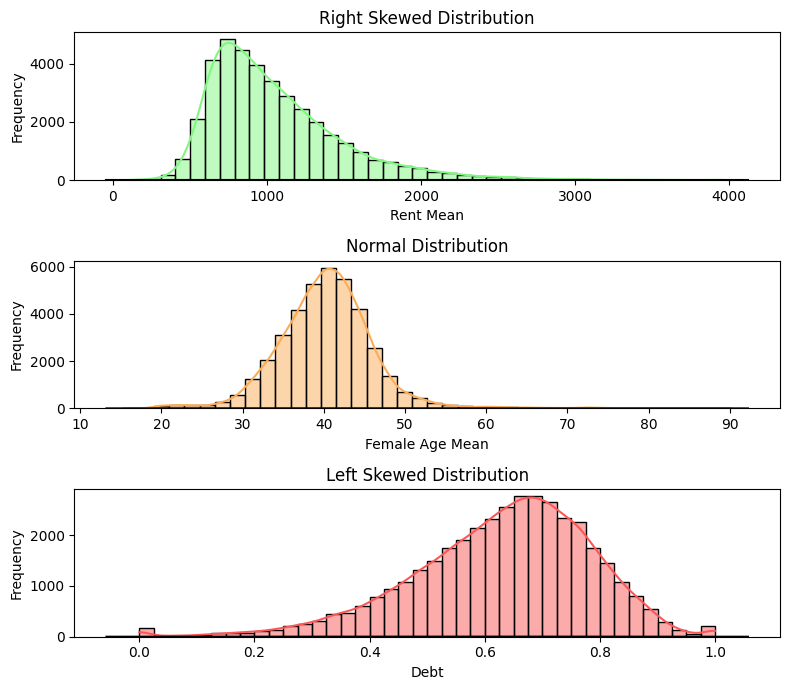

In [4]:
# Set plot size
plt.figure(figsize=(8, 7))

# Right Skewed Distribution (rent_mean)
subset_rent = numerics.dropna(subset=['rent_mean'])

plt.subplot(3, 1, 1)
sns.histplot(subset_rent['rent_mean'], kde=True, bins=40, color="#81F781")
sns.kdeplot(subset_rent['rent_mean'], color="black")
plt.title("Right Skewed Distribution")
plt.xlabel("Rent Mean")
plt.ylabel("Frequency")

# Normal Distribution (female_age_mean)
subset_female = numerics.dropna(subset=['female_age_mean'])

plt.subplot(3, 1, 2)
sns.histplot(subset_female['female_age_mean'], kde=True, bins=40, color="#FAAC58")
sns.kdeplot(subset_female['female_age_mean'], color="black")
plt.title("Normal Distribution")
plt.xlabel("Female Age Mean")
plt.ylabel("Frequency")

# Left Skewed Distribution (debt)
subset_debt = numerics.dropna(subset=['debt'])

plt.subplot(3, 1, 3)
sns.histplot(subset_debt['debt'], kde=True, bins=40, color="#FA5858")
sns.kdeplot(subset_debt['debt'], color="black")
plt.title("Left Skewed Distribution")
plt.xlabel("Debt")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [5]:
# Summary Statistics
cols = numerics[['debt', 'rent_mean', 'female_age_mean']].dropna()

summary_stats = cols.describe()
print(summary_stats)

               debt     rent_mean  female_age_mean
count  38283.000000  38283.000000     38283.000000
mean       0.629893   1054.172322        40.330892
std        0.156052    434.931926         5.665437
min        0.000000    159.134360        18.678850
25%        0.539335    742.741400        36.927335
50%        0.648680    952.526270        40.357330
75%        0.738310   1258.964035        43.558750
max        1.000000   3962.342290        79.837390


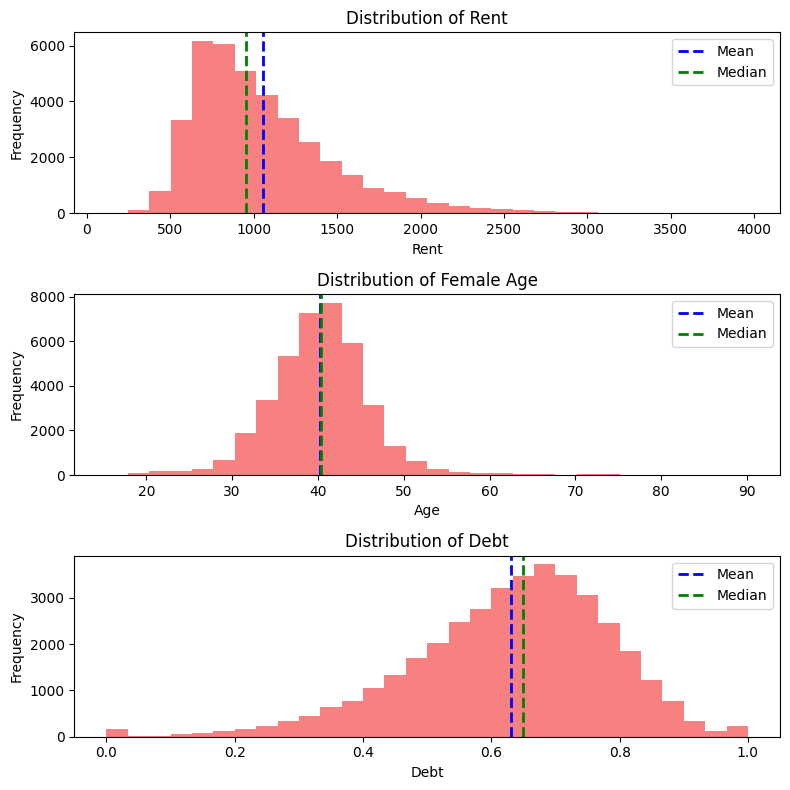

In [6]:
# Set plot size
plt.figure(figsize=(8, 8))

# First Subplot: Distribution of Rent
plt.subplot(3, 1, 1)
plt.hist(subset_rent['rent_mean'], bins=30, color="#F78181")
plt.axvline(np.mean(subset_rent['rent_mean']), color='blue', linestyle='--', linewidth=2, label='Mean')
plt.axvline(np.median(subset_rent['rent_mean']), color='green', linestyle='--', linewidth=2, label='Median')
plt.xlabel("Rent")
plt.ylabel("Frequency")
plt.title("Distribution of Rent")
plt.legend()

# Second Subplot: Distribution of Female Age
plt.subplot(3, 1, 2)
plt.hist(subset_female['female_age_mean'], bins=30, color="#F78181")
plt.axvline(np.mean(subset_female['female_age_mean']), color='blue', linestyle='--', linewidth=2, label='Mean')
plt.axvline(np.median(subset_female['female_age_mean']), color='green', linestyle='--', linewidth=2, label='Median')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Female Age")
plt.legend()

# Third Subplot: Distribution of Debt
plt.subplot(3, 1, 3)
plt.hist(subset_debt['debt'], bins=30, color="#F78181")
plt.axvline(np.mean(subset_debt['debt']), color='blue', linestyle='--', linewidth=2, label='Mean')
plt.axvline(np.median(subset_debt['debt']), color='green', linestyle='--', linewidth=2, label='Median')
plt.xlabel("Debt")
plt.ylabel("Frequency")
plt.title("Distribution of Debt")
plt.legend()

plt.tight_layout()
plt.show()


- Normal Distribution: Described as the bell curve, it is symmetric with equal distribution on both sides of the mean. In the plot, we see a symmetric curve for the female age mean.
- Right Skewed Distribution: This distribution has a long tail pointing to the right, indicating that most data is concentrated on the left side. The plot of rent mean shows this concentration on the left side, suggesting lower rent values.
- Left Skewed Distribution: Conversely, this distribution has a tail pointing to the left, indicating most data is concentrated on the right side. The plot of debt shows this concentration on the right side, suggesting higher debt values.

______

<h4> BoxPlots and Suspected Outliers: </h4>
<a id="boxplots"></a>

<b>Variance:</b> Variance indicates how spread out our data is. It is the average of the squared differences from the mean. A smaller variance suggests less variability in the data, while a larger variance suggests greater variability. Variance is calculated as: <br> 
$\sigma^2 = \frac{\sum\limits_{i=1}^N (X -\mu)^2}{N}$<br>

<b>Standard Deviation:</b> Standard deviation is a measure of the amount of variation or dispersion of a set of values. It is the square root of the variance and tells us how far our data is spread from the mean. Standard deviation is expressed as: <br>
$s = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2}$<br>

<b>1st Quartile (Q1):</b> The 1st quartile is the value below which 25% of the data fall. It represents the lower boundary of the middle 50% of the data.<br>

<b>2nd Quartile (Median):</b> The 2nd quartile (or median) divides the data into two equal halves.<br>

<b>3rd Quartile (Q3):</b> The 3rd quartile is the value below which 75% of the data fall. It represents the upper boundary of the middle 50% of the data.<br>

<b>Interquartile Range (IQR):</b> The interquartile range (IQR) is a measure of statistical dispersion, or spread, which is equal to the difference between the 1st quartile and the 3rd quartile. It is a robust measure of variability and helps us detect outliers. IQR is calculated as: <br>
$IQR = Q_3 - Q_1$

In [7]:
# Summary statistics for rent_mean
stat_rent = pd.DataFrame({
    'Rent Mean Statistics': ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max', '1st Quartile', '3rd Quartile', 'Interquartile Range'],
    'Values': [
        subset_rent['rent_mean'].mean(),
        subset_rent['rent_mean'].median(),
        subset_rent['rent_mean'].std(),
        subset_rent['rent_mean'].min(),
        subset_rent['rent_mean'].max(),
        subset_rent['rent_mean'].quantile(0.25),
        subset_rent['rent_mean'].quantile(0.75),
        subset_rent['rent_mean'].quantile(0.75) - subset_rent['rent_mean'].quantile(0.25)
    ]
})

print("Rent Mean Statistics")
print("---------------------")
print(stat_rent)

# Summary statistics for female_age_mean
stat_fage = pd.DataFrame({
    'Female Age Mean Statistics': ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max', '1st Quartile', '3rd Quartile', 'Interquartile Range'],
    'Values': [
        subset_female['female_age_mean'].mean(),
        subset_female['female_age_mean'].median(),
        subset_female['female_age_mean'].std(),
        subset_female['female_age_mean'].min(),
        subset_female['female_age_mean'].max(),
        subset_female['female_age_mean'].quantile(0.25),
        subset_female['female_age_mean'].quantile(0.75),
        subset_female['female_age_mean'].quantile(0.75) - subset_female['female_age_mean'].quantile(0.25)
    ]
})

print("Female Age Mean Statistics")
print("---------------------------")
print(stat_fage)

# Summary statistics for debt
stat_debt = pd.DataFrame({
    'Debt Statistics': ['Mean', 'Median', 'Standard Deviation', 'Min', 'Max', '1st Quartile', '3rd Quartile', 'Interquartile Range'],
    'Values': [
        subset_debt['debt'].mean(),
        subset_debt['debt'].median(),
        subset_debt['debt'].std(),
        subset_debt['debt'].min(),
        subset_debt['debt'].max(),
        subset_debt['debt'].quantile(0.25),
        subset_debt['debt'].quantile(0.75),
        subset_debt['debt'].quantile(0.75) - subset_debt['debt'].quantile(0.25)
    ]
})

print("Debt Statistics")
print("---------------")
print(stat_debt)

Rent Mean Statistics
---------------------
  Rent Mean Statistics       Values
0                 Mean  1054.833464
1               Median   952.974090
2   Standard Deviation   436.563561
3                  Min   117.150000
4                  Max  3962.342290
5         1st Quartile   742.681383
6         3rd Quartile  1259.884992
7  Interquartile Range   517.203610
Female Age Mean Statistics
---------------------------
  Female Age Mean Statistics     Values
0                       Mean  40.257491
1                     Median  40.320550
2         Standard Deviation   5.876502
3                        Min  15.360240
4                        Max  90.107940
5               1st Quartile  36.832685
6               3rd Quartile  43.548502
7        Interquartile Range   6.715817
Debt Statistics
---------------
       Debt Statistics    Values
0                 Mean  0.629916
1               Median  0.648790
2   Standard Deviation  0.156680
3                  Min  0.000000
4                  Ma

The above provides an explanation of key statistical concepts related to boxplots and provides summary statistics for each variable: rent_mean, female_age_mean, and debt. The summary statistics include mean, median, standard deviation, minimum, maximum, 1st quartile, 3rd quartile, and interquartile range.

<h4> A Note on Outliers: </h4>

In this section, we emphasize the importance of carefully analyzing outliers. While common guidelines, such as considering any value beyond three standard deviations from the mean as an outlier, exist, it's crucial to understand the underlying reasons for such observations.

In a normal distribution, it's rare for a value to deviate by three standard deviations from the mean. However, outliers may arise due to various factors, including data entry errors or genuine anomalies in the data. Therefore, it's imperative to conduct a thorough analysis to determine the context and potential causes of outliers before making conclusions.

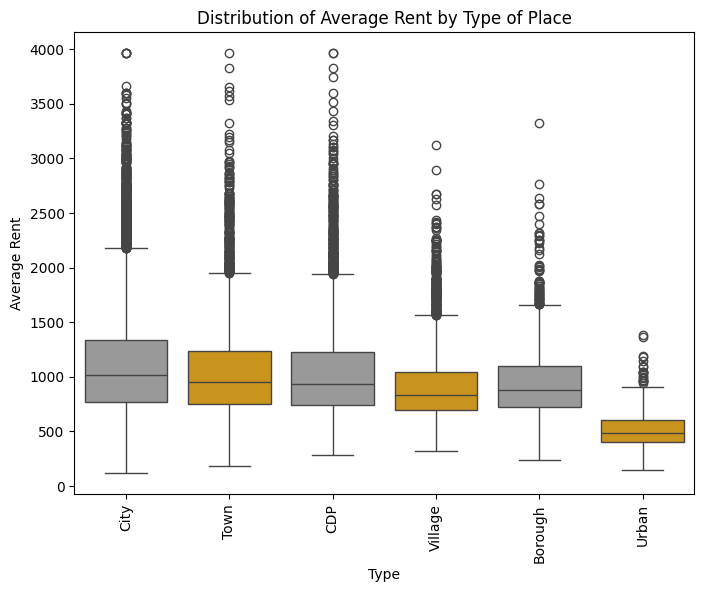

In [8]:
# Filter out missing values and select columns
t_place = df[['rent_mean', 'type']].dropna()

# Create boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=t_place, x='type', y='rent_mean', palette=['#999999', '#E69F00'])
plt.title("Distribution of Average Rent by Type of Place")
plt.xlabel("Type")
plt.ylabel("Average Rent")
plt.xticks(rotation=90)
plt.show()

The above boxplot shows the distribution of average rent by the type of place.

_______

<h4> Understanding Q-Plots </h4>
<a id="qplots"></a>
<ul>
<li><b> Right Skewed Qplot: </b> When the distribution is right skewed, the observations tend to go above the red line indicating that the distribution is right-skewed.
<li><b> Normal Distribution Qplot: </b> Although some observations are not on the line, most of the observations are on the line which indicates that the distribution is mostly normal. </li>
<li><b>Left Skewed Qplot: </b> Although this distribution is not strongly left skewed, we can see that most observations fall below the red line, indicating that the distribution is left-skewed. </li>
</ul>

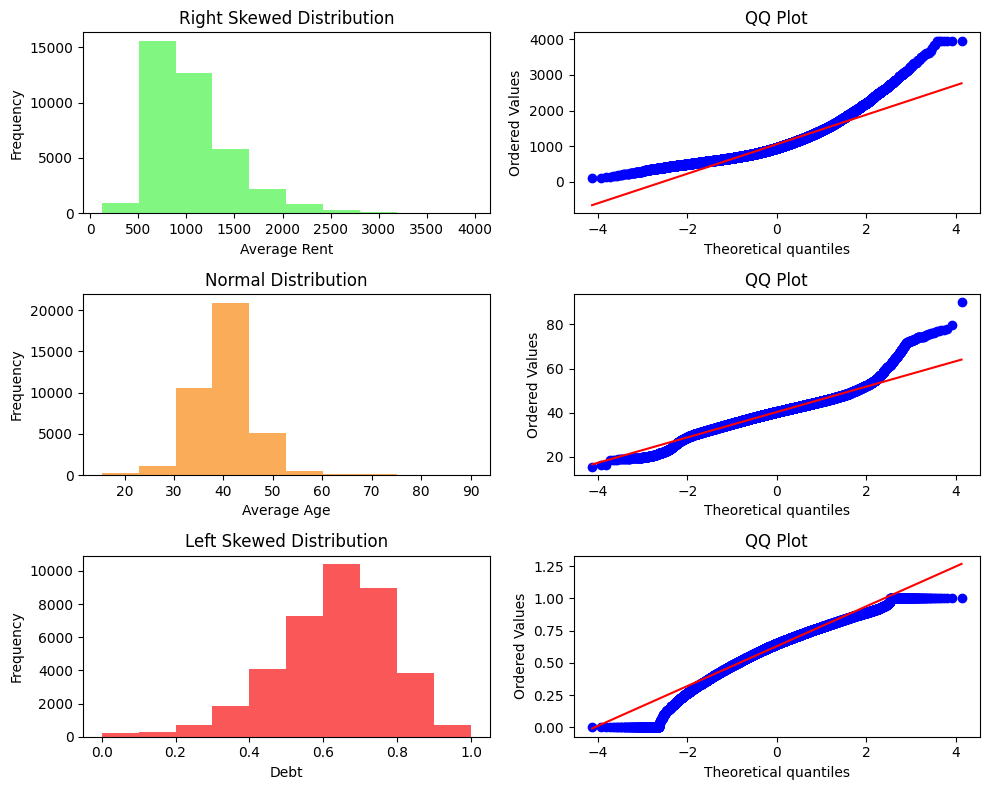

In [9]:
# Set plot size
plt.figure(figsize=(10, 8))

# First subplot (Right Skewed)
plt.subplot(3, 2, 1)
plt.hist(subset_rent['rent_mean'], color="#81F781")
plt.title("Right Skewed Distribution")
plt.xlabel("Average Rent")
plt.ylabel("Frequency")
plt.subplot(3, 2, 2)
stats.probplot(subset_rent['rent_mean'], dist="norm", plot=plt)
plt.title("QQ Plot")

# Second subplot (Normal Distribution)
plt.subplot(3, 2, 3)
plt.hist(subset_female['female_age_mean'], color="#FAAC58")
plt.title("Normal Distribution")
plt.xlabel("Average Age")
plt.ylabel("Frequency")
plt.subplot(3, 2, 4)
stats.probplot(subset_female['female_age_mean'], dist="norm", plot=plt)
plt.title("QQ Plot")

# Third subplot (Left Skewed)
plt.subplot(3, 2, 5)
plt.hist(subset_debt['debt'], color="#FA5858")
plt.title("Left Skewed Distribution")
plt.xlabel("Debt")
plt.ylabel("Frequency")
plt.subplot(3, 2, 6)
stats.probplot(subset_debt['debt'], dist="norm", plot=plt)
plt.title("QQ Plot")

plt.tight_layout()
plt.show()


Each row represents a different variable (rent mean, female age mean, debt), and within each row, there are two plots: a histogram representing the distribution of the variable and a Q-Q plot comparing the distribution of the variable to a normal distribution.

______

<h3>Using Natural Logarithms to Create Normal Distributions</h3> 

While using natural logarithms doesn't always result in a perfect normal distribution (as seen in the left-skewed example), it often approximates a normal distribution, as shown in the right-skewed example.

<b>Why Aim for a Normal Distribution?</b><br>
Most statistical techniques assume a "normal" distribution. Tests like z, t, and F-tests assume a normal distribution of the mean. Additionally, it's simpler to calculate probabilities and confidence intervals when the data follows the conditions of the Central Limit Theorem (CLT).

<b>Central Limit Theorem Conditions:</b><br>
For more details, check [this link](http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Probability/BS704_Probability12.html).


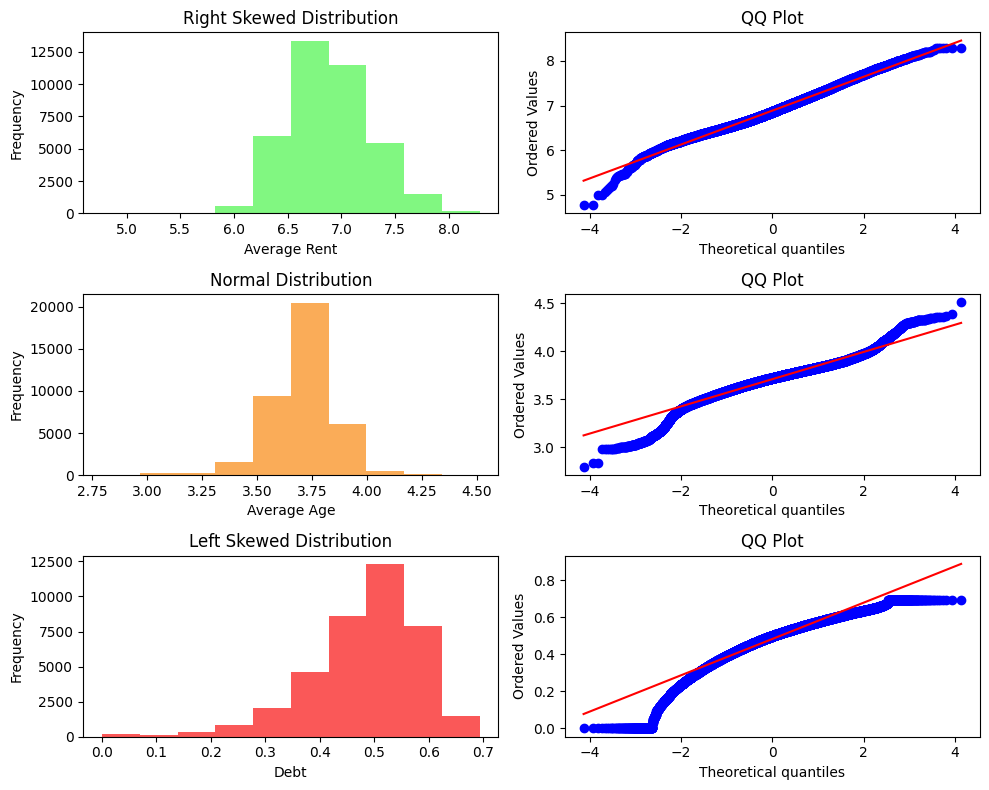

In [10]:
# Set plot size
plt.figure(figsize=(10, 8))

# First subplot (Right Skewed)
plt.subplot(3, 2, 1)
plt.hist(np.log1p(subset_rent['rent_mean']), color="#81F781")
plt.title("Right Skewed Distribution")
plt.xlabel("Average Rent")
plt.ylabel("Frequency")
plt.subplot(3, 2, 2)
stats.probplot(np.log1p(subset_rent['rent_mean']), dist="norm", plot=plt)
plt.title("QQ Plot")

# Second subplot (Normal Distribution)
plt.subplot(3, 2, 3)
plt.hist(np.log1p(subset_female['female_age_mean']), color="#FAAC58")
plt.title("Normal Distribution")
plt.xlabel("Average Age")
plt.ylabel("Frequency")
plt.subplot(3, 2, 4)
stats.probplot(np.log1p(subset_female['female_age_mean']), dist="norm", plot=plt)
plt.title("QQ Plot")

# Third subplot (Left Skewed)
plt.subplot(3, 2, 5)
plt.hist(np.log1p(subset_debt['debt']), color="#FA5858")
plt.title("Left Skewed Distribution")
plt.xlabel("Debt")
plt.ylabel("Frequency")
plt.subplot(3, 2, 6)
stats.probplot(np.log1p(subset_debt['debt']), dist="norm", plot=plt)
plt.title("QQ Plot")

plt.tight_layout()
plt.show()

Comparison with the previous method:

In the previous method, we directly plotted histograms and Q-Q plots for the original variables. Here, we're transforming the variables using natural logarithms before plotting. This transformation is often used to reduce skewness and approximate a normal distribution, which is helpful for statistical techniques that assume normality.

_________

#### Visualizing Confidence Intervals with ggplot:
Confidence intervals (CIs) help us understand how confident we are about the true population average. The wider the error bars, the less certain we are about the true mean.

We'll visualize the confidence intervals using a bar plot with error bars representing the standard deviation.

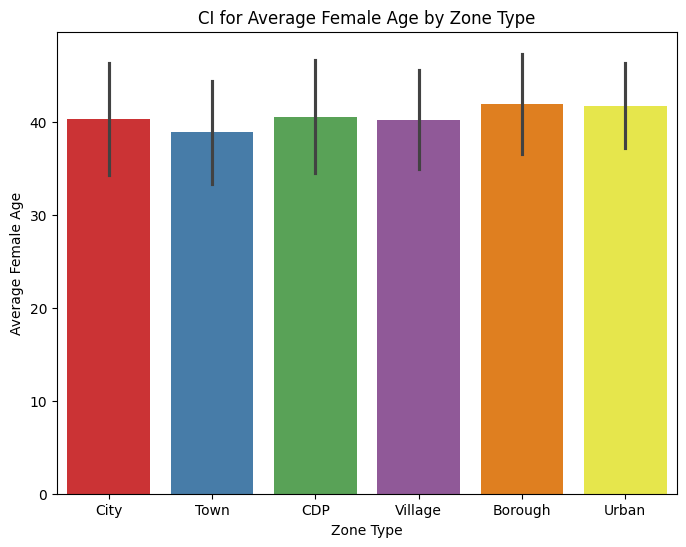

In [11]:
# Filter out missing values
subset_female = df.dropna(subset=['female_age_mean'])

# Create plot
plt.figure(figsize=(8, 6))
sns.barplot(data=subset_female, x='type', y='female_age_mean', errorbar='sd', palette='Set1')
plt.title("CI for Average Female Age by Zone Type")
plt.xlabel("Zone Type")
plt.ylabel("Average Female Age")
plt.show()

We can observe the average female age for different zone types, along with error bars indicating the confidence intervals (CIs) based on the standard deviation in the above bar plot.

This visualization provides insight into both the average female age and the uncertainty surrounding these estimates, helping us make informed interpretations about population characteristics across different zone types.

In [12]:
# Function to find the female range
def age_range(x):
    return {'ymin': np.min(x), 'ymax': np.max(x)}

print(age_range(subset_female['female_age_mean']))

# Function to find the Interquartile Range
def iqr(x):
    q1 = np.quantile(x, 0.25)
    q3 = np.quantile(x, 0.75)
    return {'median': np.median(x), 'first_quartile': q1, 'third_quartile': q3, 'interquartile_range': q3 - q1}

print(iqr(subset_female['female_age_mean']))


{'ymin': 15.36024, 'ymax': 90.10794}
{'median': 40.32055, 'first_quartile': 36.832685, 'third_quartile': 43.5485025, 'interquartile_range': 6.7158175}


These calculations provide insights into the distributional characteristics of the female age mean data, helping us understand the central tendency, spread, and variability of the dataset.

__________

### Inference Statistics:

In this section, we delve into the significance of confidence intervals and the methodology for determining the confidence interval of a distribution. Additionally, we touch briefly on the subject of hypothesis testing, elucidating why understanding these concepts is paramount before attempting to address our primary question.

#### Hypothesis Testing

Through this scenario, we introduce the concept of Hypothesis Testing, comprising two types of hypotheses: the Null Hypothesis and the Alternative Hypothesis.

- **Null Hypothesis ($H_0$):** This represents the "status quo". For instance, in comparing the means of two variables such as the average income of males and females, the Null Hypothesis would suggest "no difference".

- **Alternative Hypothesis ($H_A$):** This opposes the Null Hypothesis. For instance, in our income example, it would imply guilt, indicating that the average incomes of males and females are not equal.

  **Null Hypothesis (Average Income Example):**
  $Aincome_M = Aincome_F$

  **Alternative Hypothesis (Average Income Example):**
  $Aincome_M \ne Aincome_F$

#### Confidence Intervals and P-values:

![Visual Interpretation of Distribution of Significance Level, p-values, and z-score](https://www.researchgate.net/profile/Vladimir_Kekez/publication/271846185/figure/fig6/AS:295099222249473@1447368545063/Visual-interpretation-of-distribution-of-Significance-Level-p-values-and-z-score-in.png)

**Confidence Intervals (CI):** These signify the certainty that a specific value lies within two defined points. While confidence intervals can be of various types (e.g., 90%, 95%, 99%), the 95% interval is the most commonly employed.

**P-value:** It denotes the probability of a given event occurring. Assuming a 95% confidence interval, if the p-value is less than alpha ($\alpha$), we reject the Null Hypothesis in favor of the Alternative Hypothesis.

**Significance Level:** This represents the probability of rejecting the Null Hypothesis, often denoted as alpha ($\alpha$).

**Finding the Confidence Interval for the Population Mean:**

$\overline{x}\pm z^* s \frac{s}{\sqrt{N-1}}$

Where:
- $\overline{x}$ = Sample Mean
- z = z-score
- s = Standard Error
- N = Sample size

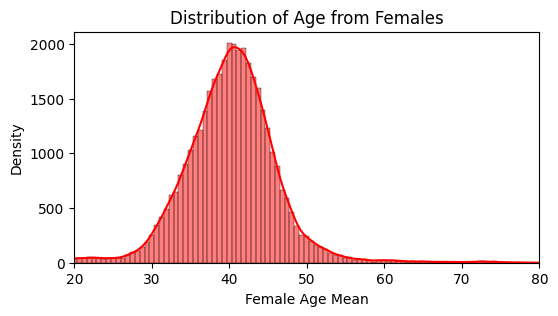

In [13]:
# Filter out missing values and select columns
subset_female_age = numerics[['female_age_mean']].dropna()

# Create histogram
plt.figure(figsize=(6, 3))
sns.histplot(data=subset_female_age, x='female_age_mean', bins=120, color='red', kde=True)
plt.title("Distribution of Age from Females")
plt.xlabel("Female Age Mean")
plt.ylabel("Density")
plt.xticks(np.arange(20, 81, 10))
plt.xlim(20, 80)
plt.show()

In [14]:
# Filter out missing values
subset_female_age = numerics.dropna(subset=['female_age_mean'])

# Sample size
n = subset_female_age.shape[0]
print("Number of rows after filtering Null values:", n)

# Standard deviation
std = np.std(subset_female_age['female_age_mean'])

# Sample mean
x_bar = np.mean(subset_female_age['female_age_mean'])

# Standard error for 95% confidence level
serror = -stats.norm.ppf(0.025) * std / np.sqrt(n)

# Confidence interval
lower_interval = x_bar - serror
upper_interval = x_bar + serror

print("The lower interval is:", round(lower_interval, 2), " The upper interval is:", round(upper_interval, 2))

Number of rows after filtering Null values: 38728
The lower interval is: 40.2  The upper interval is: 40.32


<b>What does this example of confidence level signify?</b><br>
<a id="confidence_intervals"></a>
It means that if we take 95% of random samples from a group of 38,728 (the mean age of females without null values) female Americans, the resulting confidence intervals will encompass the actual population mean age of females, which falls between 40.2 and 40.32.

**Assessing the Accuracy of Confidence Intervals: How Often Do They Capture the True Population Average?**

We perform this process to assess the reliability of our calculated confidence intervals. By replicating the sampling process multiple times and computing confidence intervals each time, we can observe how often the true population parameter (in this case, the average age of females) falls within these intervals. This gives us an indication of how well our confidence intervals capture the true population parameter.

Essentially, we want to ensure that our confidence intervals, derived from samples, are sufficiently accurate representations of the population parameter. This assessment helps us understand the level of confidence we can have in our estimates.

So, by conducting this analysis, we can determine the percentage of times our confidence intervals contain the true population average, which is a measure of the accuracy and reliability of our estimation procedure.

In [15]:
# Function to replicate sampling
def rep_sample_n(tbl, size, replace=False, reps=1):
    n = tbl.shape[0]
    i = [np.random.choice(n, size=size, replace=replace) for _ in range(reps)]
    rep_tbl = pd.concat([tbl.iloc[idx] for idx in i], keys=range(1, reps + 1), names=['replicate'])
    return rep_tbl

# Parameters
n = 50
ci_95 = stats.norm.ppf(0.975)

# Replicate sampling and calculating confidence interval
rep_tbl = rep_sample_n(subset_female_age[['female_age_mean']], size=n, reps=50, replace=True)
ci = rep_tbl.groupby('replicate')['female_age_mean'].agg(['mean', 'std']).reset_index()
ci['lower'] = ci['mean'] - ci_95 * (ci['std'] / np.sqrt(n))
ci['upper'] = ci['mean'] + ci_95 * (ci['std'] / np.sqrt(n))

# Calculate the percentage of times the true average is between the lower and upper bounds
capturing_avg = ci.apply(lambda row: 'In Between' if row['lower'] < subset_female_age['female_age_mean'].mean() < row['upper'] else 'Out of Bounds', axis=1)
score = (capturing_avg == 'In Between').sum() / len(capturing_avg) * 100

print("The percentage in which the true average is 'in between': {:.2f}%".format(score))


The percentage in which the true average is 'in between': 96.00%


In [16]:
# Set seed for reproducibility
np.random.seed(42)

# Parameters
mu = np.mean(subset_female_age['female_age_mean'])
n = 50  # Sample size
sample_mean = np.mean(np.random.choice(subset_female_age['female_age_mean'], size=n))
sample_std = np.std(np.random.choice(subset_female_age['female_age_mean'], size=n))
standard_error = norm.ppf(0.025) * sample_std / np.sqrt(n)  # 95% confidence level

# Calculate Z-score
z_score = (sample_mean - mu) / standard_error

print("Z-score is:", round(z_score, 2))

# Calculate p-value for two-sided test
p_val_two_sided = 2 * norm.cdf(-abs(z_score))
print("Two-sided p-value is:", round(p_val_two_sided, 2))

# Calculate p-value for one-sided test
p_val_one_sided = p_val_two_sided / 2
print("One-sided p-value is:", round(p_val_one_sided, 2))


Z-score is: -0.3
Two-sided p-value is: 0.76
One-sided p-value is: 0.38


<a id="p_val"></a>
<b> In this case, since p-value is > than $\alpha$ we do not reject $H_0$</b>

_______

<h4>Contingency Tables: </h4>
<a id="contingency"></a>
The primary objective of contingency tables is to summarize the relationship between two categorical variables. In this example, we summarize the relationship between state and type.

<h4> Chi-Squared Test of Independence </h4>
<a id="chi_s"> </a>

<b> - Null Hypothesis ($H_0$):</b> There is no association between the two variables.

<b> - Alternative Hypothesis ($H_A$):</b> There is an association between the two variables and hence, the variables are dependent.

<b> Note:</b> We will address the test of independence and its implications later. However, for now, I wanted to illustrate a simple method to ensure that independence exists between two variables to meet one of the conditions of the <b> Central Limit Theorem.</b>

In [17]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['state', 'state_ab', 'city', 'place', 'type', 'primary']


In [18]:
# Create contingency table
mytable = pd.crosstab(df['type'], df['state'])

# Summary of the contingency table
print(mytable)

# Chi-square test of independence
chi2, p, dof, expected = chi2_contingency(mytable)
print("Chi-square statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies table:")
print(expected)

state    Alabama  Alaska  Arizona  Arkansas  California  Colorado  \
type                                                                
Borough        0       0        0         0           0         0   
CDP            0       0      798         0           0         0   
City           0     105        0       363        4193       668   
Town         612       0        0         0           0         0   
Urban          0       0        0         0           0         0   
Village        0       0        0         0           0         0   

state    Connecticut  Delaware  District of Columbia  Florida  ...  \
type                                                           ...   
Borough            0         0                     0        0  ...   
CDP              445         0                     0        0  ...   
City               0         0                    98     2289  ...   
Town               0       109                     0        0  ...   
Urban              0       

<b>In later updates we will go more in depth into the chi squared test of independence. </b>

In [19]:
# Select the 'state' and 'type' columns from the DataFrame
selected_columns = df[['state', 'type']]

# Create a contingency table
cont_table = pd.crosstab(selected_columns['state'], selected_columns['type'])

# Calculate the percentage of occurrences for each combination
prop_table = (cont_table / cont_table.sum().sum()) * 100
prop_table = prop_table.round(2)

print(prop_table)

type                  Borough   CDP   City  Town  Urban  Village
state                                                           
Alabama                  0.00  0.00   0.00  1.57   0.00     0.00
Alaska                   0.00  0.00   0.27  0.00   0.00     0.00
Arizona                  0.00  2.04   0.00  0.00   0.00     0.00
Arkansas                 0.00  0.00   0.93  0.00   0.00     0.00
California               0.00  0.00  10.74  0.00   0.00     0.00
Colorado                 0.00  0.00   1.71  0.00   0.00     0.00
Connecticut              0.00  1.14   0.00  0.00   0.00     0.00
Delaware                 0.00  0.00   0.00  0.28   0.00     0.00
District of Columbia     0.00  0.00   0.25  0.00   0.00     0.00
Florida                  0.00  0.00   5.86  0.00   0.00     0.00
Georgia                  0.00  0.00   2.76  0.00   0.00     0.00
Hawaii                   0.00  0.45   0.00  0.00   0.00     0.00
Idaho                    0.00  0.00   0.38  0.00   0.00     0.00
Illinois                 

<ul> 
    <li><b> First Row:</b> Number of Observations.  </li>
    <li><b>Second Row:</b> Chi Square Contribution. </li>
    <li><b> Third Row:</b>Total Percentage per Row </li>
    <li><b>Fourth Row: </b> Total Percentage per Column </li>
    <li><b>Fifth Row:  </b>Total Percentage of the Table. </li>
    </ul>

In [20]:
# Filter out rows with NA values in 'type' and 'state' columns
type_state = df.dropna(subset=['type', 'state'])

# Create contingency table
cont_table = pd.crosstab(type_state['state'], type_state['type'])

# Perform chi-square test for independence
chi2, p, dof, expected = chi2_contingency(cont_table)

# Print contingency table
print("Contingency Table:")
print(cont_table)

# Print chi-square test results
print("\nChi-square Test Results:")
print("Chi-square:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)

Contingency Table:
type                  Borough   CDP  City  Town  Urban  Village
state                                                          
Alabama                     0     0     0   612      0        0
Alaska                      0     0   105     0      0        0
Arizona                     0   798     0     0      0        0
Arkansas                    0     0   363     0      0        0
California                  0     0  4193     0      0        0
Colorado                    0     0   668     0      0        0
Connecticut                 0   445     0     0      0        0
Delaware                    0     0     0   109      0        0
District of Columbia        0     0    98     0      0        0
Florida                     0     0  2289     0      0        0
Georgia                     0     0  1078     0      0        0
Hawaii                      0   174     0     0      0        0
Idaho                       0     0   148     0      0        0
Illinois             

______

<h4> T-Distribution </h4>
<a id="t_distribution"></a>
<img src="https://i2.wp.com/www.real-statistics.com/wp-content/uploads/2012/11/t-distribution-chart.png?resize=439%2C264">
The t-distribution is a distribution that is only used for small samples. The first question I had when dealing with this types of distribution is why we need a t-distribution when we receive daily tons of data making it impossible to have a small sample. Well, t-distributions are more often used when <b>conducting an experiment</b> which usually have smaller samples. <br><br>

<b>Summary of t-Distribution: </b>
<ul>
    <li><b>Sample Size: </b> The sample size must be smaller than 30 in order to be considered for a t-distribution. </li>
    <li><b>Degrees of freedom:</b> As the sample size gets closer to 30, the t-distribution will look exactly like a normal distribution. Also, degrees of freedom determines the thickness of the tail. </li>
    <li><b>T-score: </b> To calculate the t-score we use the following formula, $(\overline{x} - Null) / s$ where s is the standard error and Null the Null Hypothesis.</li>
    
</ul>


<b> Excercise 1: Let's find the 95% Confidence Interval of a sample for the rent_mean in the state of New York.</b>

In [21]:
# Filter data for California and New York states
two_states = df[df['state'].isin(['California', 'New York'])]
two_states = two_states.dropna(subset=['rent_mean'])

# Randomly sample 22 observations
np.random.seed(42)
sample_twostates = two_states.sample(n=22)

# Calculate statistics for New York state
ny_samp = sample_twostates[sample_twostates['state'] == 'New York']
n = ny_samp.shape[0]  # Sample size
x_bar = ny_samp['rent_mean'].mean()  # Sample mean
std_ny = ny_samp['rent_mean'].std()  # Sample standard deviation

# Calculate t-score (two-tailed, alpha=0.025, df=n-1)
t_score = abs(t.ppf(0.025, df=n - 1))

# Calculate confidence interval
lower_bound = x_bar - t_score * (std_ny / np.sqrt(n))
upper_bound = x_bar + t_score * (std_ny / np.sqrt(n))

print("95% confidence interval for the rent mean in New York:")
print("Lower bound:", round(lower_bound, 2))
print("Upper bound:", round(upper_bound, 2))

95% confidence interval for the rent mean in New York:
Lower bound: 1073.86
Upper bound: 1712.38


<b> Excercise 2: Assume Mu = 1000 for the rent of New York, let's find the p-value to see if there is sufficient evidence that we could reject $H_0$ in favor of $H_A$, remember if the p-value is less than 0.05 significance level then we reject the Null in favor of the alternative. </b>

In [22]:
# Calculate standard error
standard_error = std_ny / np.sqrt(n)

# Null hypothesis mean
mu = 1000

# Calculate t-score
t_score = (x_bar - mu) / standard_error

# Calculate p-value
p_value = 2 * (1 - t.cdf(abs(t_score), df=n - 1))  # Two-tailed test

print("p-value:", p_value)

p-value: 0.021208894653689248


Since our p-value is less than 0.05 we go in favor of the <b> Alternate Hypothesis </b> , meaning that there is sufficient evidence that the average rent in New York is something different than 1000.

<h4> Estimating the Difference between independent Means from two categorical variables</h4>
<a id="two_independent"></a>

<ul>
    <li><b>Degrees of Freedom: </b> df = $Min(n_1 - n_2)$ </li>
    <li><b> Point of Estimates (Sample Mean): </b>   ($\overline{x_1} {-} \overline{x_2}$) </li>
    <li><b> Standard Error of difference between two independent means:</b> $SE(_\overline{x_1}-_\overline{x_2})$ = $\sqrt{SE_1^2} + \sqrt{SE_2^2}$ <br> where $SE_1$ = $\frac{S_1}{\sqrt{n_1}}$ and $SE_2$ = $\frac{S_2}{\sqrt{n_2}}$</li>
    <li><b>Difference between independent means formula:</b> SE = $(\overline{x_1} - \overline{x_2})\pm t^*_{df} SE_{\overline{x_1} - \overline{x_2}}$ </li>
</ul>

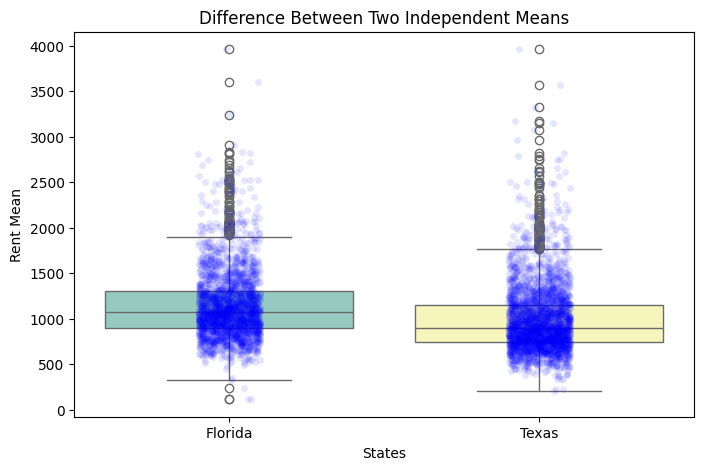

In [23]:
# Filter data for Texas and Florida
south_states = df[df['state'].isin(['Texas', 'Florida'])]

# Create boxplot with means
plt.figure(figsize=(8, 5))
sns.boxplot(x='state', y='rent_mean', data=south_states, palette='Set3')
sns.stripplot(x='state', y='rent_mean', data=south_states, color='blue', alpha=0.1, size=5)

# Set plot labels and title
plt.title('Difference Between Two Independent Means')
plt.xlabel('States')
plt.ylabel('Rent Mean')
plt.show()

In [24]:
# Set seed for reproducibility
np.random.seed(42)

# Filter data for Texas and Florida and take samples of size 24 from each
two_states = df[df['state'].isin(['Texas', 'Florida'])]
small_sample = two_states.groupby('state').apply(lambda x: x.sample(n=24)).reset_index(drop=True)

# Sample sizes
n_1 = small_sample[small_sample['state'] == 'Texas'].shape[0]
n_2 = small_sample[small_sample['state'] == 'Florida'].shape[0]

# Sample mean for each state
xbar_tex = small_sample[small_sample['state'] == 'Texas']['rent_mean'].mean()
xbar_flo = small_sample[small_sample['state'] == 'Florida']['rent_mean'].mean()

# Standard deviation for each state
std_tex = small_sample[small_sample['state'] == 'Texas']['rent_mean'].std()
std_flo = small_sample[small_sample['state'] == 'Florida']['rent_mean'].std()

# Degrees of freedom
deg_f = min(n_1 - 1, n_2 - 1)

# T-score
t_score = abs(t.ppf(0.025, df=deg_f))

# Standard Error
std_error = np.sqrt((std_tex**2 / n_1) + (std_flo**2 / n_2))

# Calculate confidence interval for the difference in means
upper_bound = (xbar_tex - xbar_flo) + (t_score * std_error)
lower_bound = (xbar_tex - xbar_flo) - (t_score * std_error)

print("95% confidence interval for the difference in means:")
print("Lower bound:", round(lower_bound, 2))
print("Upper bound:", round(upper_bound, 2))

95% confidence interval for the difference in means:
Lower bound: -472.7
Upper bound: -73.51


Time for some <b> Hypothesis Testing </b>. Remember if the p-value is < 0.05 of our significance level then we reject the null hypothesis in favor of the alternative hypothesis. <br>

<ul>
    <li><b>Null Hypothesis ($H_0$)</b>: There is no difference between average rents in the states of Florida and Texas or $H_{tex} - H_{flo} = 0$ </li>
    <li><b>Alternative Hypothesis ($H_A$)</b>: There is a difference between the average rents in the states of Florida and Texas or $H_{tex} - H_{flo} \neq 0$ </li>
</ul>

In [25]:
# Point of estimate
p_estimate = xbar_tex - xbar_flo

# Calculate t-score
t_score = abs((p_estimate - 0) / std_error)

# Degrees of freedom
deg_f = n_1 + n_2 - 2

# Calculate p-value
p_value = 2 * (1 - t.cdf(t_score, df=deg_f))

print("p-value:", p_value)

p-value: 0.006868770469360852


<b>The p-value indicates that there is significant evidence that indicates that there is a difference between the average rent between the states of Texas and Florida. </b>

____

<h4> Comparing Different Means from Categorical Variables: </h4>
<a id="anova"></a>
To compare more than two categorical variables we will need <b>F-Statistics</b> and <b> Analysis of Variance (ANOVA) </b><br>


<b> Hypothesis Testing: </b>
<ul>
<li>$H_0$: The mean is the same across the 4 states mentioned below. </li>
<li>$H_A$: At least one pair of mean are different from each other.</li>
</ul>

<b> F-Statistics: </b>
 $\frac{Variability \ between \ groups}{Variability \ within \ groups}$<br>

<ul> 
    <li><b> Between Group Variability:</b> Variability that comes within the class (Direct correlation with the states).</li>
    <li> <b>Within Group Variability: </b> Variability that comes due to other factors. </li>
    </ul>
    
    
<ul>
    <li><b>Sum of Squares:</b> Measures the total variability of our response variable (ex: Average Rent).
 $$SSG = \sum_{i=1}^{n} n_j(y_i - \overline{y})^2$$ where <b>$y_i$ </b>= Value of the response variable while $\overline{y}$ = Grand mean of the response variable (Average rent per state) and $n_j$ = the number of observations in the group. </li>

 </ul>

In [26]:
# Filter data for selected states
selected_states = df[df['state'].isin(['New York', 'California', 'Florida', 'Texas'])]

# Group by state and calculate mean, count, and standard deviation
all_avg = selected_states.groupby('state')['rent_mean'].agg(['mean', 'count', 'std']).reset_index()

# Rename columns for consistency
all_avg.columns = ['state', 'avg', 'Count', 'std']

print(all_avg)

        state          avg  Count         std
0  California  1468.453183   4151  484.531309
1     Florida  1143.950813   2251  374.513170
2    New York  1256.308767   2511  477.192280
3       Texas   988.027534   2741  368.225271


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


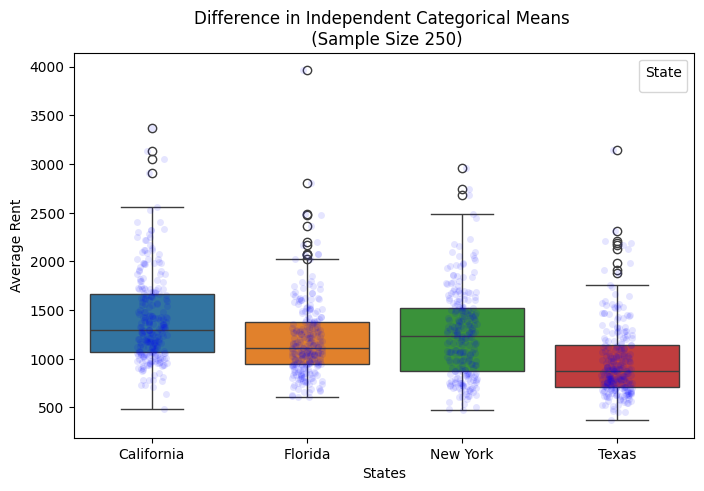

In [27]:
# Set seed for reproducibility
np.random.seed(42)

# Sampling
four_states = df[df['state'].isin(['New York', 'California', 'Florida', 'Texas'])]
four_states = four_states.groupby('state').apply(lambda x: x.sample(n=250)).reset_index(drop=True)

# Plot boxplots
plt.figure(figsize=(8, 5))
sns.boxplot(data=four_states, x='state', y='rent_mean', hue='state')
sns.stripplot(data=four_states, x='state', y='rent_mean', color='blue', alpha=0.1, dodge=True)
plt.title("Difference in Independent Categorical Means \n (Sample Size 250)")
plt.xlabel("States")
plt.ylabel("Average Rent")
plt.legend(title='State')
plt.show()

In [28]:
four_states = four_states.dropna(subset=['rent_mean'])
# point estimate
point_estimate = four_states.groupby('state')['rent_mean'].mean()

# Calculate the f-statistic
f_stat, p_val = f_oneway(four_states[four_states['state'] == 'New York']['rent_mean'],
                         four_states[four_states['state'] == 'California']['rent_mean'],
                         four_states[four_states['state'] == 'Florida']['rent_mean'],
                         four_states[four_states['state'] == 'Texas']['rent_mean'])

print("F-statistic:", f_stat)
print("p-value:", p_val)

F-statistic: 45.445115185088
p-value: 1.6358251916747634e-27


<b> Summary: </b><br>
<ul>
    <li><b>Sample Size: </b> A sample size of 250 observations is used in this example for each of the states (total of 1000 observations). </li>
    <li><b>P-value: </b> P-value in this case is less that 0.05 which indicates that at least one pair of the states shows enough evidence that the means are different. </li>
    <li><b>Adjusted P-Value: </b> The states that have the highest adjusted p-value are Texas and Florida which is not a surprise since these are the two states that have a similar average rent. </li>
</ul>

_______

### Bootstrapping (Simulation Base-Method):
<a id="bootstrapping"></a>
We make small samples from a big sample to make inference from the unknown population. Remember, the population is unknown, the dataset we have is based on samples rather than the whole US population. In this exaple, we will use as much as 1000 samples with the size of 750 observations from the big sample in order to infer what is the median of the average mortgage cost of the population. Something to mention, is that the random samples are done with replacement which means that after the first sample is taken in the second sample observations from the first sample could still be taken.


### Key intakes from Bootstrapping:
<ul>
    <li>Treat the sample as the population (in this case our entire dataset is the population). </li>
    <li>Bootstrapping can be used for many purposes but in this case we are using it to find the confidence intervals. </li>
    <li> Bootstrapping is also used when we stack models together to make certain predictions.</li>
    </ul>

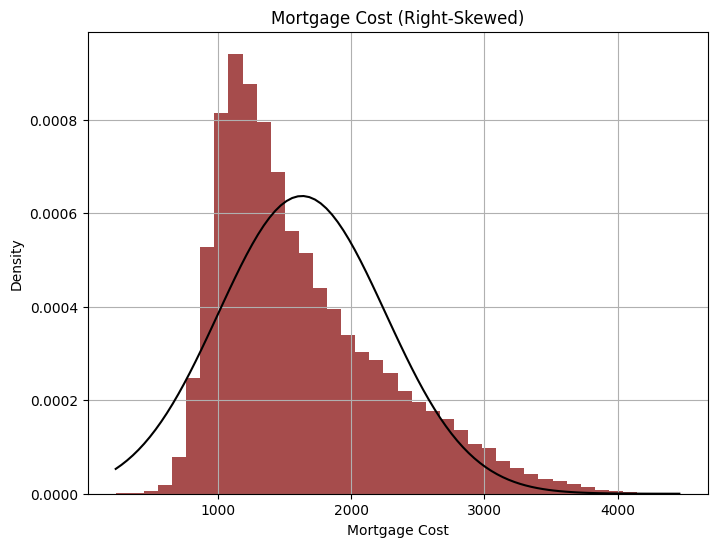

In [29]:
# Subset data for mortgage costs
subset_mortgage = df['hc_mortgage_mean'].dropna()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(subset_mortgage, bins=40, density=True, color="#800000", alpha=0.7)

# Plot normal distribution curve
mu, sigma = np.mean(subset_mortgage), np.std(subset_mortgage)
x = np.linspace(min(subset_mortgage), max(subset_mortgage), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='black')

# Add labels and title
plt.title('Mortgage Cost (Right-Skewed)')
plt.xlabel('Mortgage Cost')
plt.ylabel('Density')
plt.grid(True)

plt.show()

### Sampling

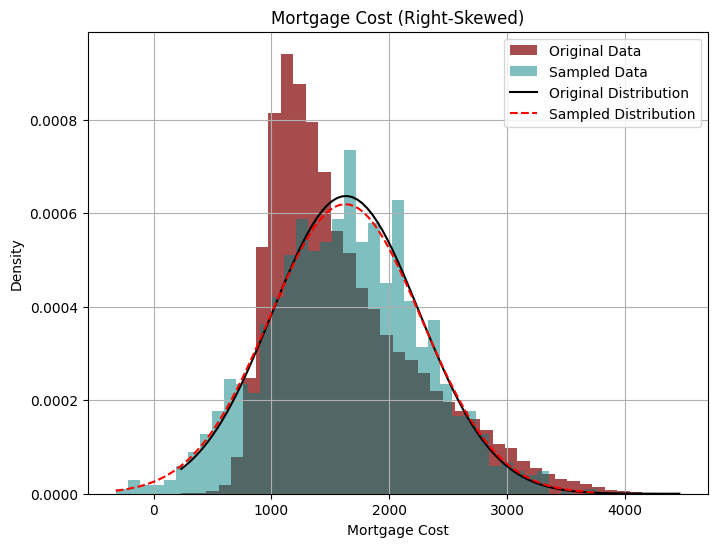

In [30]:
from scipy.stats import norm

# Subset data for mortgage costs
subset_mortgage = df['hc_mortgage_mean'].dropna()

# Parameters for the normal distribution
mu, sigma = np.mean(subset_mortgage), np.std(subset_mortgage)

# Generate samples from the same distribution
sample_size = 1000  # Choose the sample size you want
samples = np.random.normal(mu, sigma, sample_size)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(subset_mortgage, bins=40, density=True, color="#800000", alpha=0.7, label='Original Data')
plt.hist(samples, bins=40, density=True, color="#008080", alpha=0.5, label='Sampled Data')

# Plot normal distribution curve for original data
x = np.linspace(min(subset_mortgage), max(subset_mortgage), 100)
plt.plot(x, norm.pdf(x, mu, sigma), color='black', label='Original Distribution')

# Plot normal distribution curve for sampled data
mu_sampled, sigma_sampled = np.mean(samples), np.std(samples)
x_sampled = np.linspace(min(samples), max(samples), 100)
plt.plot(x_sampled, norm.pdf(x_sampled, mu_sampled, sigma_sampled), color='red', linestyle='--', label='Sampled Distribution')

# Add labels and title
plt.title('Mortgage Cost (Right-Skewed)')
plt.xlabel('Mortgage Cost')
plt.ylabel('Density')
plt.grid(True)
plt.legend()

plt.show()

### Bootstrapping

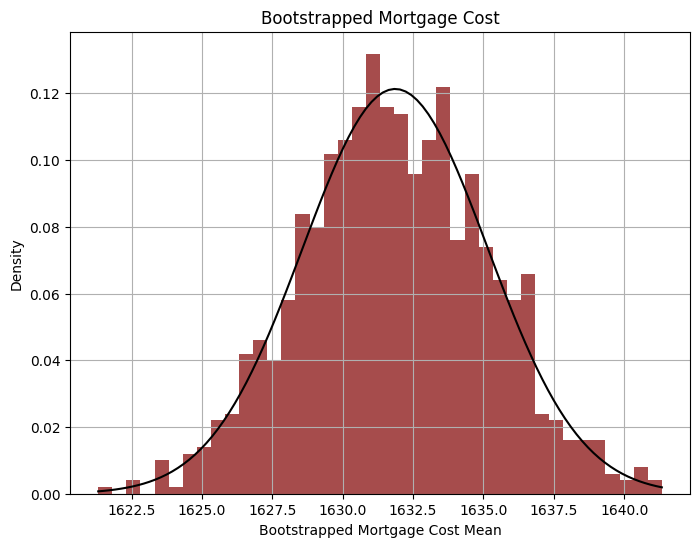

In [31]:
from scipy.stats import norm

def bootstrapping(data, n_samples):
    bootstrap_samples = []
    for _ in range(n_samples):
        bootstrap_sample = np.random.choice(data, size=len(data))
        bootstrap_samples.append(bootstrap_sample)
    return bootstrap_samples

# Original data
subset_mortgage = df['hc_mortgage_mean'].dropna()

# Number of bootstrap samples
n_bootstrap_samples = 1000

# Generate bootstrap samples
bootstrap_samples = bootstrapping(subset_mortgage, n_bootstrap_samples)

# Calculate means of bootstrap samples
bootstrap_means = np.mean(bootstrap_samples, axis=1)

# Plot histogram of bootstrap means
plt.figure(figsize=(8, 6))
plt.hist(bootstrap_means, bins=40, density=True, color="#800000", alpha=0.7)

mu_boot, sigma_boot = np.mean(bootstrap_means), np.std(bootstrap_means)
x_boot = np.linspace(min(bootstrap_means), max(bootstrap_means), 100)
plt.plot(x_boot, norm.pdf(x_boot, mu_boot, sigma_boot), color='black')

# Add labels and title
plt.title('Bootstrapped Mortgage Cost')
plt.xlabel('Bootstrapped Mortgage Cost Mean')
plt.ylabel('Density')
plt.grid(True)

plt.show()

When the bootstrapped data shows a normal distribution while the original data is right-skewed, it indicates that the sample statistic (mean, median, etc.) calculated from the original data is relatively robust and doesn't depend heavily on the distributional assumptions.

------------------

### Visualizing Contingency Tables
<a id="mosaic"></a>

In [32]:
df.head()

,UID,BLOCKID,SUMLEVEL,COUNTYID,STATEID,state,state_ab,city,place,type,...,female_age_mean,female_age_median,female_age_stdev,female_age_sample_weight,female_age_samples,pct_own,married,married_snp,separated,divorced
0,220336,NaN,140,16,2,Alaska,AK,Unalaska,Unalaska City,City,...,32.78177,31.91667,19.31875,440.46429,1894.0,0.25053,0.47388,0.30134,0.03443,0.09802
1,220342,NaN,140,20,2,Alaska,AK,Eagle River,Anchorage,City,...,38.97956,39.66667,20.05513,466.65478,1947.0,0.94989,0.52381,0.01777,0.00782,0.13575
2,220343,NaN,140,20,2,Alaska,AK,Jber,Anchorage,City,...,22.20427,23.16667,13.86575,887.67805,3570.0,0.00759,0.50459,0.06676,0.01000,0.01838
3,220345,NaN,140,20,2,Alaska,AK,Anchorage,Point Mackenzie,City,...,37.00750,34.00000,22.06347,281.49420,1049.0,0.20247,0.44428,0.05933,0.00000,0.21563
4,220347,NaN,140,20,2,Alaska,AK,Anchorage,Anchorage,City,...,34.96611,31.75000,20.49887,655.98066,2905.0,0.56936,0.51034,0.08315,0.06731,0.08711


In [33]:
df['regions'] = None

west = ['CA', 'OR', 'UT', 'WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN']
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI', 'MA', 'MD', 'VT', 'NH', 'ME']

df['regions'] = df['state_ab'].apply(lambda x: "West" if x in west else
                                      ("SouthWest" if x in south_west else
                                       ("South East" if x in south_east else
                                        ("MidWest" if x in mid_west else
                                         ("NorthEast" if x in north_east else
                                          "Caribbean")))))

# Printing unique regions
print(df['regions'].unique())


['West' 'South East' 'SouthWest' 'NorthEast' 'MidWest' 'Caribbean']


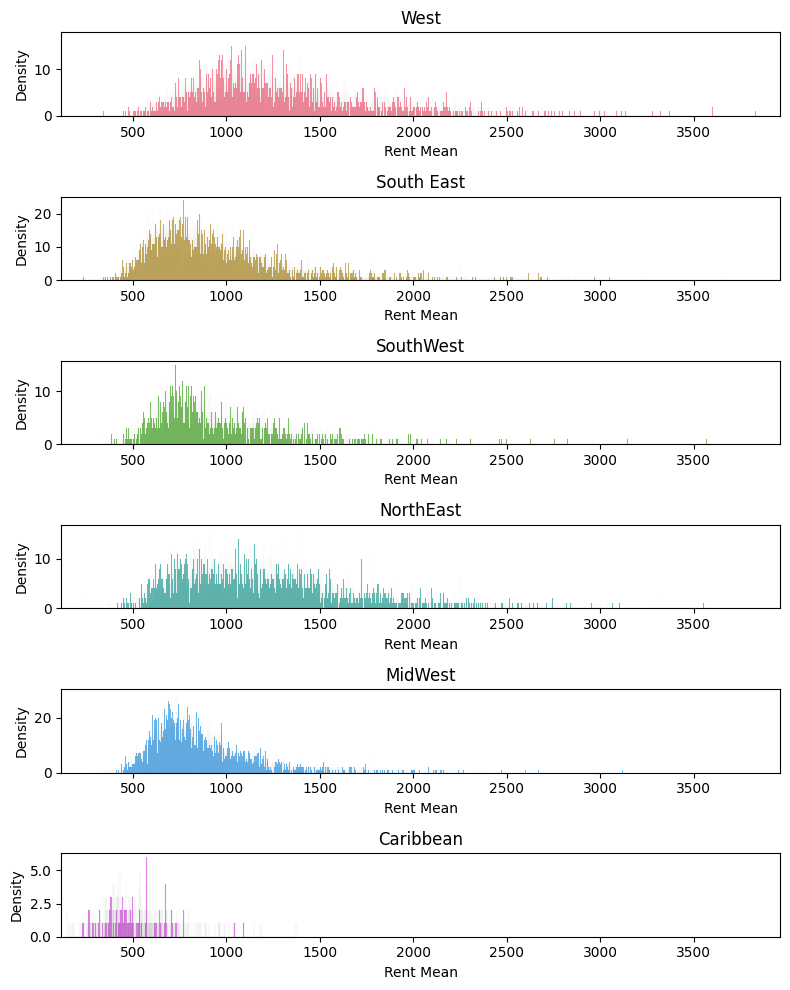

In [34]:
subset_rent = df.dropna(subset=['rent_mean'])

plt.figure(figsize=(8, 10))

regions = subset_rent['regions'].unique()

# Define a color palette with distinct colors for each region
palette = sns.color_palette('husl', n_colors=len(regions))

# Initialize common limits and labels
x_limit = subset_rent['rent_mean'].min(), subset_rent['rent_mean'].max()

for i, region in enumerate(regions, 1):
    plt.subplot(6, 1, i)
    data = subset_rent[subset_rent['regions'] == region]
    sns.histplot(data=data, x='rent_mean', binwidth=1, color=palette[i-1])
    plt.title(region)
    plt.xlabel('Rent Mean')
    plt.ylabel('Density')
    plt.xlim(x_limit)

plt.tight_layout()
plt.show()


In [35]:
# Create a contingency table between the two categorical variables
cont_table = pd.crosstab(df['regions'], df['type'])

# Create a frequency table
freq_df = cont_table.apply(lambda x: round(x / x.sum(), 2))

# Change the structure of the frequency table
melt_df = freq_df.reset_index().melt(id_vars='regions')

# Print the contingency table and melted frequency table
print("Contingency Table:")
print(cont_table)
print("\nMelted Frequency Table:")
print(melt_df)

Contingency Table:
type        Borough   CDP  City  Town  Urban  Village
regions                                              
Caribbean         0     0     0     0    489        0
MidWest           0  1591  3930     0      0     3405
NorthEast      1735  1589  4541     0      0        0
South East        0   351  6631  1727      0     1167
SouthWest         0  1350   287  2767      0        0
West              0   335  6329   806      0        0

Melted Frequency Table:
       regions     type  value
0    Caribbean  Borough   0.00
1      MidWest  Borough   0.00
2    NorthEast  Borough   1.00
3   South East  Borough   0.00
4    SouthWest  Borough   0.00
5         West  Borough   0.00
6    Caribbean      CDP   0.00
7      MidWest      CDP   0.31
8    NorthEast      CDP   0.30
9   South East      CDP   0.07
10   SouthWest      CDP   0.26
11        West      CDP   0.06
12   Caribbean     City   0.00
13     MidWest     City   0.18
14   NorthEast     City   0.21
15  South East     City   0.

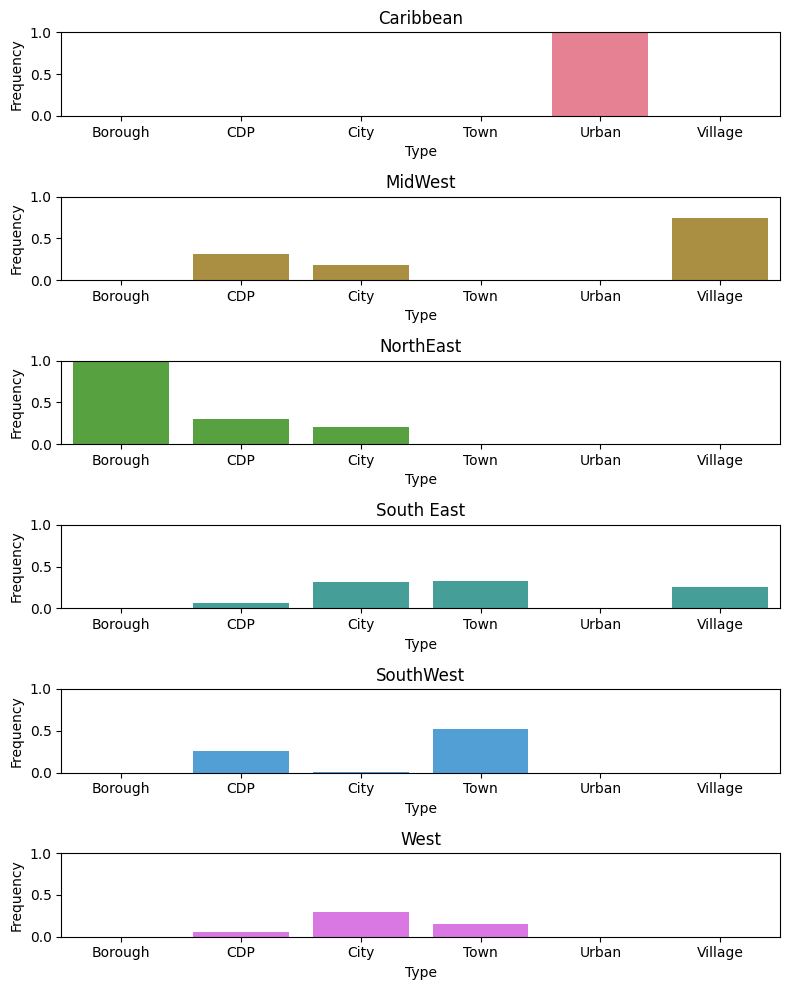

In [36]:
melt_df.columns = ["Regions", "Type", "Frequency"]

plt.figure(figsize=(8, 10))

regions = melt_df['Regions'].unique()

# Determine the maximum frequency value across all regions
max_freq = melt_df['Frequency'].max()

# Define a custom color palette with distinct colors for each subplot
colors = sns.color_palette('husl', n_colors=len(regions))

for i, (region, color) in enumerate(zip(regions, colors), 1):
    plt.subplot(6, 1, i)
    data = melt_df[melt_df['Regions'] == region]
    sns.barplot(data=data, x='Type', y='Frequency', palette=[color], ci=None)
    plt.xlabel('Type')
    plt.ylabel('Frequency')
    plt.title(region)
    plt.ylim(0, max_freq)  # Set the same y-axis limits for all subplots

plt.tight_layout()
plt.show()


These plots helps us determine which categorical variables are <b> underrepresented </b> and <b> overrepresented </b> in relation to each other. A chi-squared test will be used later on to examine this relationship.

__________

### Detecting outliers through Standard Deviations:

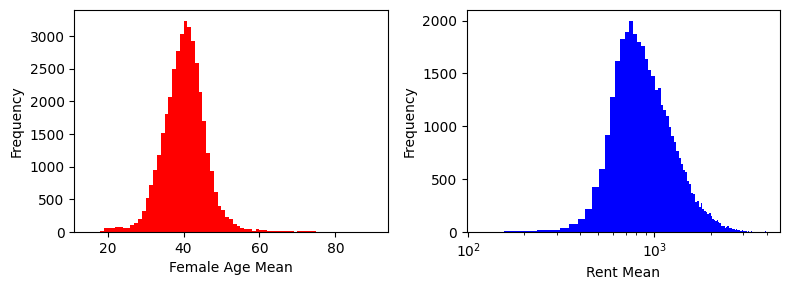

In [37]:
fem_age_data = df.dropna(subset=['female_age_mean'])['female_age_mean']
rent_data = df.dropna(subset=['rent_mean'])['rent_mean']

plt.figure(figsize=(8, 3))

# Plot histogram for female age
plt.subplot(1, 2, 1)
plt.hist(fem_age_data, bins=range(int(min(fem_age_data)), int(max(fem_age_data)) + 1, 1), color='red')
plt.xlabel('Female Age Mean')
plt.ylabel('Frequency')

# Plot histogram for rent mean
plt.subplot(1, 2, 2)
plt.hist(rent_data, bins=100, color='blue')
plt.xscale('log')
plt.xlabel('Rent Mean')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

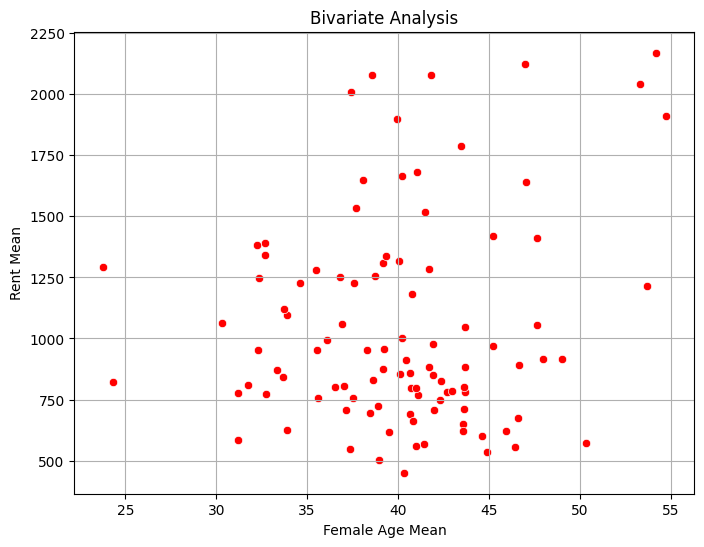

In [38]:
# Filter out NA values and select the columns
female_rent_data = df.dropna(subset=['female_age_mean', 'rent_mean'])[['female_age_mean', 'rent_mean']]

# Set seed for reproducibility
np.random.seed(1)

# Sample 100 random rows
small_sample = female_rent_data.sample(n=100)

plt.figure(figsize=(8, 6))

# Plot scatter plot for bivariate analysis
sns.scatterplot(data=small_sample, x='female_age_mean', y='rent_mean', color='red')
plt.xlabel('Female Age Mean')
plt.ylabel('Rent Mean')
plt.title('Bivariate Analysis')
plt.grid(True)
plt.show()

In [39]:
# Calculate the sample standard deviation
sample_std = small_sample.copy()
sample_std['sd_female'] = (sample_std['female_age_mean'] - sample_std['female_age_mean'].mean()) / sample_std['female_age_mean'].std()
sample_std['sd_rent'] = (sample_std['rent_mean'] - sample_std['rent_mean'].mean()) / sample_std['rent_mean'].std()

# Display the first few rows
print(sample_std.head())

       female_age_mean   rent_mean  sd_female   sd_rent
38800         43.70338   782.26063   0.627871 -0.617531
4966          46.97467  2125.67236   1.199053  2.561804
35132         40.32705   450.21851   0.038349 -1.403345
679           33.90672   626.47564  -1.082669 -0.986213
14820         46.43796   554.43606   1.105341 -1.156703


_______________

### Understanding Chi-Squared Tests and Standarized Residuals:

<img src="https://i.stack.imgur.com/H59e8.png">

Standardized residual = $\frac{(observed\ count – expected\ count)} {\sqrt{expected\ count}}$<br>
Expected Count = $\frac{\sum{data\ in\ row\ + data\ in\ col}}{total\ data}$

In [40]:
# Create a contingency table between the two categorical variables
cont_table = pd.crosstab(df['type'], df['regions'])

# Add totals for each region
df_cont_table = cont_table.copy()
df_cont_table['Total'] = df_cont_table.sum(axis=1)

# Add row totals
df_cont_table.loc['Total'] = df_cont_table.sum()

# Display the contingency table with row totals
print(df_cont_table)

regions  Caribbean  MidWest  NorthEast  South East  SouthWest  West  Total
type                                                                      
Borough          0        0       1735           0          0     0   1735
CDP              0     1591       1589         351       1350   335   5216
City             0     3930       4541        6631        287  6329  21718
Town             0        0          0        1727       2767   806   5300
Urban          489        0          0           0          0     0    489
Village          0     3405          0        1167          0     0   4572
Total          489     8926       7865        9876       4404  7470  39030


In [41]:
# Create a contingency table between the two categorical variables
cont_table = pd.crosstab(df['regions'], df['type'])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(cont_table)

# Calculate standardized residuals
residuals = (cont_table - expected) / expected

# Reshape the DataFrame
resid = residuals.reset_index().melt(id_vars='regions', var_name='type', value_name='residual')

# Display the standardized residuals
print(resid)

       regions     type   residual
0    Caribbean  Borough  -1.000000
1      MidWest  Borough  -1.000000
2    NorthEast  Borough   3.962492
3   South East  Borough  -1.000000
4    SouthWest  Borough  -1.000000
5         West  Borough  -1.000000
6    Caribbean      CDP  -1.000000
7      MidWest      CDP   0.333749
8    NorthEast      CDP   0.511771
9   South East      CDP  -0.734058
10   SouthWest      CDP   1.293757
11        West      CDP  -0.664428
12   Caribbean     City  -1.000000
13     MidWest     City  -0.208749
14   NorthEast     City   0.037604
15  South East     City   0.206637
16   SouthWest     City  -0.882885
17        West     City   0.522626
18   Caribbean     Town  -1.000000
19     MidWest     Town  -1.000000
20   NorthEast     Town  -1.000000
21  South East     Town   0.287757
22   SouthWest     Town   3.626841
23        West     Town  -0.205421
24   Caribbean    Urban  78.815951
25     MidWest    Urban  -1.000000
26   NorthEast    Urban  -1.000000
27  South East    Ur

____________

### Visualizing US State Map with GGPlot

<a id="us_map"></a>



The goal of doing this visualization is to show the community a simple way for visualizing US maps using ggplot and the map library. This is useful when you would want to present visually which states or country had a high or low numeric variables.

**Summary of Findings:**
<ul>
    <li>States with Average high divorce rates: States with high divorce rates include Nevada, Oklahoma, Arkansas and West Virginia.</li>
    <li>States with Average low divorce rates: States with low divorce rates include California, Utah, New York and New Jersey </li>
</ul>



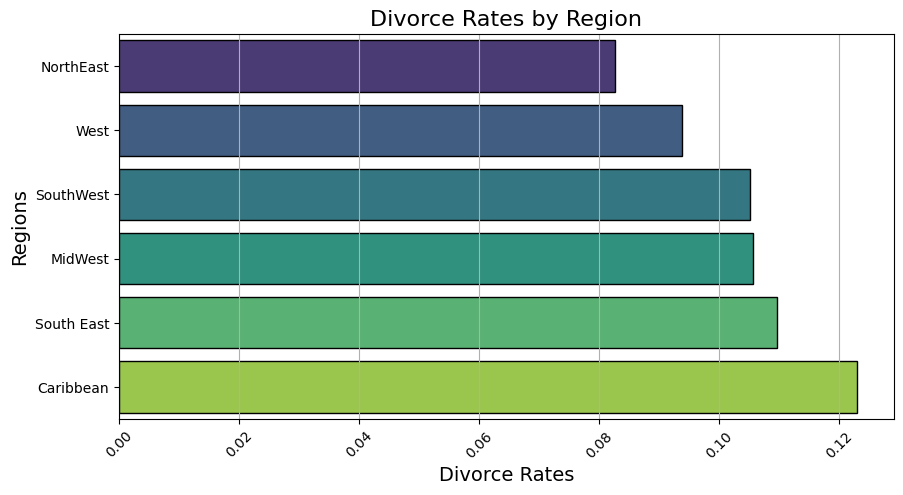

In [42]:
# Calculate the average divorce rate by region
div_rates = df[['regions', 'divorced']].groupby('regions').mean().reset_index()

# Sort the regions by average divorce rate
div_rates = div_rates.sort_values(by='divorced')

# Plotting
plt.figure(figsize=(10, 5))
sns.barplot(data=div_rates, x='divorced', y='regions', palette='viridis', edgecolor='black')
plt.title('Divorce Rates by Region', fontsize=16)
plt.xlabel('Divorce Rates', fontsize=14)
plt.ylabel('Regions', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='x')
plt.show()


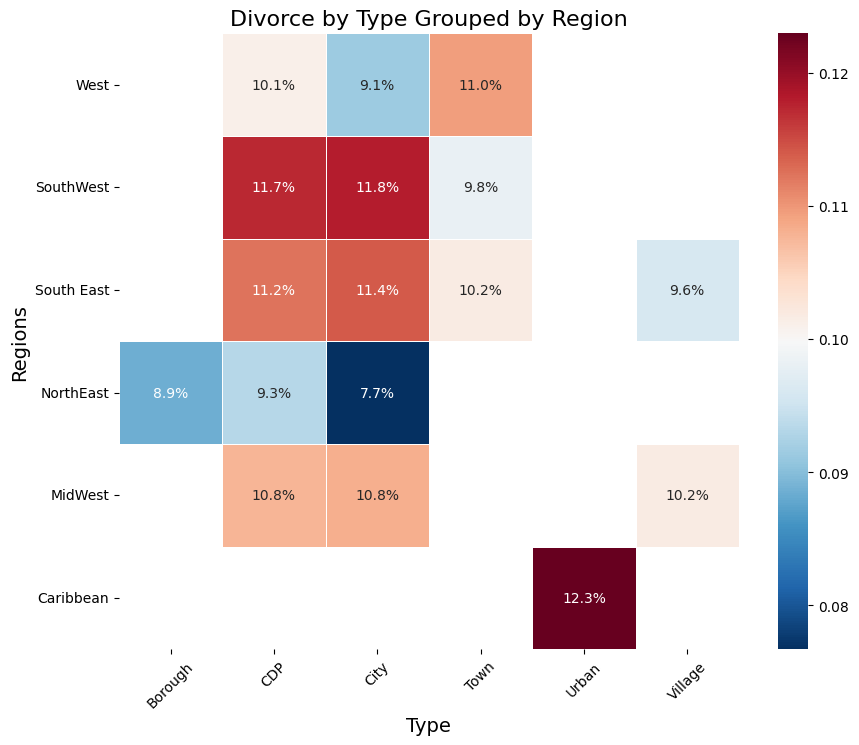

In [43]:
# Calculate the average divorce rate by region and type
heatmap_tbl = df[['regions', 'type', 'divorced']].groupby(['regions', 'type']).mean().reset_index()

# Reverse the order of regions for better visualization
heatmap_tbl['regions'] = heatmap_tbl['regions'].astype('category')
heatmap_tbl['regions'] = heatmap_tbl['regions'].cat.reorder_categories(heatmap_tbl['regions'].cat.categories[::-1])

# Pivot the DataFrame for heatmap plotting
heatmap_pivot = heatmap_tbl.pivot_table(index='regions', columns='type', values='divorced')

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_pivot, cmap='RdBu_r', annot=True, fmt='.1%', linewidths=0.5)
plt.title('Divorce by Type Grouped by Region', fontsize=16)
plt.xlabel('Type', fontsize=14)
plt.ylabel('Regions', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


____________

### Statistical Plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


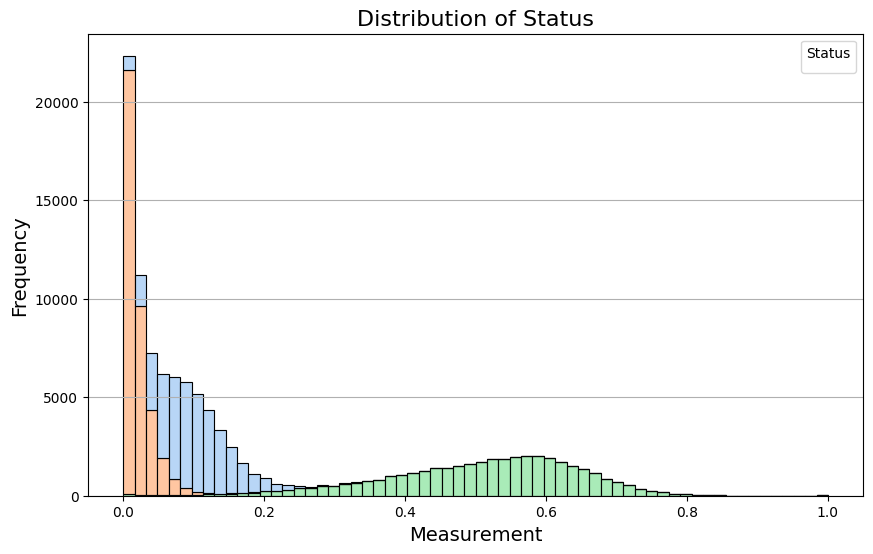

In [44]:
# Selecting relevant columns
prepared_df = df[['regions', 'type', 'divorced', 'separated', 'married']]

# Melt the DataFrame
long_tbl = pd.melt(prepared_df, id_vars=['regions', 'type'], var_name='status', value_name='measurement')

# Define custom colors
colors = sns.color_palette("pastel", 3)

# Plotting
plt.figure(figsize=(10, 6))
sns.histplot(data=long_tbl, x='measurement', hue='status', multiple='stack', palette=colors)
plt.title('Distribution of Status', fontsize=16)
plt.xlabel('Measurement', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.legend(title='Status')
plt.grid(axis='y')
plt.show()


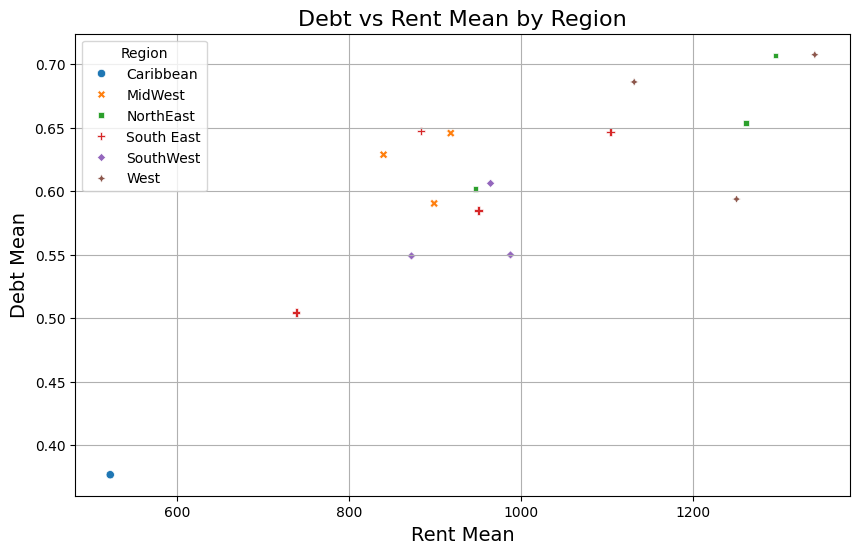

In [45]:
# Select relevant columns and calculate mean values by region and type
prepared_tbl = df[['regions', 'type', 'rent_mean', 'debt']].groupby(['regions', 'type']).mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(data=prepared_tbl, x='rent_mean', y='debt', hue='regions', palette='tab10', style='regions')
plt.title('Debt vs Rent Mean by Region', fontsize=16)
plt.xlabel('Rent Mean', fontsize=14)
plt.ylabel('Debt Mean', fontsize=14)
plt.legend(title='Region')
plt.grid(True)
plt.show()


____________________
_____________

### Thank you :)